# Part I

In [1]:
import numpy as np

In [2]:
from meshpy.triangle import MeshInfo, build

import matplotlib.pyplot as plt

In [3]:
def quadrature3(f):
	w=[-27/48,25/48,25/48,25/48]
	sigma=[[1/3,1/3],[1/5,1/5],[1/5,1/3],[1/3,1/5]]
	ret=0
	for s in range(0,4):
		ret+=w[s]*f(sigma[s])
	ret=ret/2
	return ret

In [4]:
def reffcn(a,b,c):
	f_k=lambda x: np.matrix([[(c[0]-a[0])*x[0]+(b[0]-a[0])*x[1]+a[0]],[(c[1]-a[1])*x[0]+(b[1]-a[1])*x[1]+a[1]]])
	return f_k

In [19]:
def triintfct(f,T):
	n=np.array(T).shape[0]
	ret=0
	for s in range(0,n):
		tr=T[s]
		a=tr[0]
		b=tr[1]
		c=tr[2]
		f_k=reffcn(a,b,c)
		g=lambda x: abs((c[0]-a[0])*(b[1]-a[1])-(b[0]-a[0])*(c[1]-a[1]))*f(f_k(x))
		integ=quadrature3(g)
		# print("Triangle %i: " %(s+1) + str(integ))
		ret+=integ
	ret=ret.tolist()
	# print("Total: " + str(ret[0][0]))
	return ret

Test:

In [6]:
#T=[[-1,0,0,0,0,1],[0,0,2,0,0,1],[0,1,0,2,1,2],[0,1,2,0,2,1],[0,1,1,2,2,1],[3,3,1,2,2,1]]
T=[[[0,0],[2,0],[0,1]],[[0,1],[0,2],[1,2]],[[0,1],[2,0],[2,1]],[[0,1],[1,2],[2,1]],[[2,2],[1,2],[2,1]]]
T

[[[0, 0], [2, 0], [0, 1]],
 [[0, 1], [0, 2], [1, 2]],
 [[0, 1], [2, 0], [2, 1]],
 [[0, 1], [1, 2], [2, 1]],
 [[2, 2], [1, 2], [2, 1]]]

In [7]:
f=lambda x: (x[0]+5)*x[1]

In [8]:
integ_f=triintfct(f,T)

Total: 22.092592592592595


Wahrer Wert ist für int_0^2 int_0^2 (x+5)*y dx dy = 24, ca. 22 ist also nicht allzuweit davon entfernt.

In [9]:
points = [(0,0),(2,0),(2,2),(0,2)]
facets = [(0,1),(1,2),(2,3),(3,0)]

In [10]:
mesh_info = MeshInfo() # generate instance
mesh_info.set_points(points) # set points
mesh_info.set_facets(facets) # set facets

In [11]:
mesh = build(mesh_info, volume_constraints=True, max_volume=0.001, attributes=True, generate_faces=True,  generate_neighbor_lists=True, quality_meshing=True, mesh_order=1, min_angle=33)

In [12]:
pts = np.vstack(mesh.points)
elem = np.vstack(mesh.elements)
fac = np.vstack(mesh.facets)

In [13]:
print(pts.shape)
print(elem.shape)
print(fac.shape)

(3493, 2)
(6762, 3)
(222, 2)


In [14]:
Tr=[]

for ii in range(0,elem.shape[0]):
    t=[pts[elem[ii][0]].tolist(),pts[elem[ii][1]].tolist(),pts[elem[ii][2]].tolist()]
    Tr+=[t]

In [15]:
Tr[1:5]

[[[0.9426025370067325, 0.2380301024158072],
  [0.982345527317609, 0.2544956414380301],
  [0.9466075094893696, 0.2808620933753236]],
 [[1.4795806666106077, 1.409848639066544],
  [1.4580125826718817, 1.386602650547124],
  [1.5041357406158586, 1.3803411449949334]],
 [[1.0, 1.0],
  [1.0339218135329207, 1.043161265116002],
  [0.9882216773234205, 1.0378178145165198]],
 [[1.0920659492394504, 0.2601704206061528],
  [1.092059325918564, 0.21335499555368945],
  [1.1264134001548933, 0.22569805883997252]]]

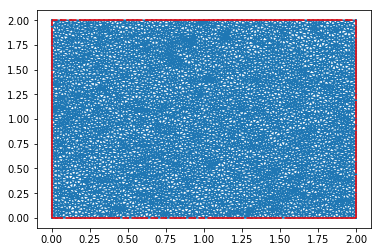

In [16]:
plt.triplot(pts[:,0], pts[:,1], elem[:,:])
for v1,v2 in fac:
    x,y = zip(pts[v1],pts[v2])
    plt.plot(x,y,'--r')
plt.show()

In [17]:
integ_f=triintfct(f,Tr)

Total: 23.99634996066636


Mit dieser feinen Triangulierung sind wir mit ca. 23.996 also sehr nahe am wahren Wert 24.

(380, 2)
(694, 3)
(64, 2)


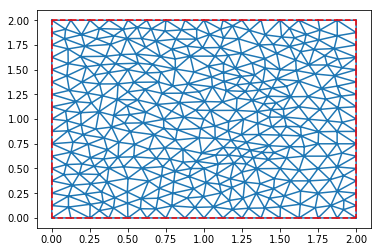

Total: 23.985982615161753


In [18]:
mesh = build(mesh_info, volume_constraints=True, max_volume=0.01, attributes=True, generate_faces=True,  generate_neighbor_lists=True, quality_meshing=True, mesh_order=1, min_angle=33)

pts = np.vstack(mesh.points)
elem = np.vstack(mesh.elements)
fac = np.vstack(mesh.facets)

print(pts.shape)
print(elem.shape)
print(fac.shape)

Tr=[]

for ii in range(0,elem.shape[0]):
    t=[pts[elem[ii][0]].tolist(),pts[elem[ii][1]].tolist(),pts[elem[ii][2]].tolist()]
    Tr+=[t]

plt.triplot(pts[:,0], pts[:,1], elem[:,:])
for v1,v2 in fac:
    x,y = zip(pts[v1],pts[v2])
    plt.plot(x,y,'--r')
plt.show()

integ_f=triintfct(f,Tr)

Mit der etwas wenig feinen Triangulierung ist der Wert immer noch recht gut bei ca. 23.986 statt 24.

# Part II

In [20]:
def grad_h1(a_cons,b_cons,r_cons,T_om):
	# A_1
	f_a11=lambda x: 3*a_cons*x[0]**2+b_cons*x[1]**2-r_cons
	a11=triintfct(f_a11,T_om)
	f_a12=lambda x: 2*a_cons*x[0]*x[1]
	a12=triintfct(f_a12,T_om)
	f_a21=lambda x: 2*b_cons*x[0]*x[1]
	a21=triintfct(f_a21,T_om)
	f_a22=lambda x: a_cons*x[0]**2+3*b_cons*x[1]**2-r_cons
	a22=triintfct(f_a22,T_om)
	A_1_b_1_h1=[a11[0][0],a12[0][0],a21[0][0],a22[0][0]]

	# b_1
	f_b1=lambda x: 2*a_cons*x[0]
	b1=triintfct(f_b1,T_om)
	f_b2=lambda x: 2*b_cons*x[1]
	b2=triintfct(f_b2,T_om)
	A_1_b_1_h1+=[b1[0][0],b2[0][0]]

	return A_1_b_1_h1

In [21]:
def grad_h2(a_cons,b_cons,r_cons,T_om):
	# A_1
	f_a11=lambda x: 2*a_cons*x[0]**2+2*b_cons*x[1]**2-r_cons
	a11=triintfct(f_a11,T_om)
	f_a12=lambda x: (a_cons-b_cons)*x[0]*x[1]
	a12=triintfct(f_a12,T_om)
	A_1_b_1_h2=[a11[0][0],a12[0][0],-a12[0][0],a11[0][0]]

	# b_1
	f_b1=lambda x: 2*a_cons*x[0]
	b1=triintfct(f_b1,T_om)
	f_b2=lambda x: 2*b_cons*x[1]
	b2=triintfct(f_b2,T_om)
	A_1_b_1_h2+=[b1[0][0],b2[0][0]]

	return A_1_b_1_h2

In [22]:
def choose_h(a_cons,b_cons,r_cons,T_om,h1_or_h2):
	if h1_or_h2 == 1:
		return grad_h1(a_cons,b_cons,r_cons,T_om)
	else:
		return grad_h2(a_cons,b_cons,r_cons,T_om)

In [23]:
def pol_area(points):
	x=[q[0] for q in points]
	y=[q[1] for q in points]
	ret=0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))
	# print("Polygon Area: " + str(ret))
	return ret

In [24]:
def grad_alg(a_cons,b_cons,r_cons,points,facets,N_max,t_start,max_vol_set,h1_or_h2):
	counter=0
	show_plot=1
	t_step=t_start

	# make mesh
	mesh_info = MeshInfo()
	mesh_info.set_points(points)
	mesh_info.set_facets(facets)
	area_polygon=pol_area(points)
	rel_max_vol_set=area_polygon*max_vol_set
	mesh = build(mesh_info, volume_constraints=True, max_volume=rel_max_vol_set, attributes=True, generate_faces=True,  generate_neighbor_lists=True, quality_meshing=True, mesh_order=1, min_angle=33)
	pts = np.vstack(mesh.points)
	elem = np.vstack(mesh.elements)
	fac = np.vstack(mesh.facets)
	T_om=[]
	for ii in range(0,elem.shape[0]):
		t=[pts[elem[ii][0]].tolist(),pts[elem[ii][1]].tolist(),pts[elem[ii][2]].tolist()]
		T_om+=[t]

	f_jay=lambda x: a_cons*x[0]**2+b_cons*x[1]**2-r_cons

	jay_o=triintfct(f_jay,T_om)

	jay_0=jay_o

	print("For Omega_" + str(counter) + ": J(Omega_" + str(counter) + ")=" + str(jay_o[0][0]) + "\n")

	A_1_b_1=choose_h(a_cons,b_cons,r_cons,T_om,h1_or_h2)
	print("\n\n"+str(np.linalg.norm(np.array(A_1_b_1[0:4])))+"\n\n")


	while counter <= N_max:
		if show_plot==1:
			print("Omega_" + str(counter) + " plot:")

			# plot mesh
			plt.triplot(pts[:,0], pts[:,1], elem[:,:])
			for v1,v2 in fac:
				x,y = zip(pts[v1],pts[v2])
				plt.plot(x,y,'--r')
			plt.show()
			show_plot=0

		# (Id + t*grad J(Omega))(points)
		n_points=len(points)
		pts_grad=[]
		for s in range(0,n_points):
			dp=points[s]
			e_1=dp[0]-t_step*(A_1_b_1[0]*dp[0]+A_1_b_1[1]*dp[1]+A_1_b_1[4])
			e_2=dp[1]-t_step*(A_1_b_1[2]*dp[0]+A_1_b_1[3]*dp[1]+A_1_b_1[5])
			pts_grad+=[(e_1,e_2)]

		#print(pts_grad)

		# make second mesh
		mesh_info = MeshInfo()
		mesh_info.set_points(pts_grad)
		mesh_info.set_facets(facets)
		area_polygon=pol_area(pts_grad)
		rel_max_vol_set=area_polygon*max_vol_set
		mesh = build(mesh_info, volume_constraints=True, max_volume=rel_max_vol_set, attributes=True, generate_faces=True,  generate_neighbor_lists=True, quality_meshing=True, mesh_order=1, min_angle=33)
		pts = np.vstack(mesh.points)
		elem = np.vstack(mesh.elements)
		fac = np.vstack(mesh.facets)
		T_om_2=[]
		for ii in range(0,elem.shape[0]):
			t=[pts[elem[ii][0]].tolist(),pts[elem[ii][1]].tolist(),pts[elem[ii][2]].tolist()]
			T_om_2+=[t]

		f_jay=lambda x: a_cons*x[0]**2+b_cons*x[1]**2-r_cons

		jay_t=triintfct(f_jay,T_om_2)

		if jay_t<jay_o:
			print("\nFor t=" + str(t_step) + " step is accepted!\n")
			counter+=1
			jay_o=jay_t
			jay_fin=jay_t
			print("For Omega_" + str(counter) + ": J(Omega_" + str(counter) + ")=" + str(jay_t[0][0]) + "\n")
			T_om=T_om_2
			A_1_b_1=choose_h(a_cons,b_cons,r_cons,T_om,h1_or_h2)
			print("\n\n"+str(np.linalg.norm(np.array(A_1_b_1[0:4])))+"\n\n")
			show_plot=1
			t_step=t_start
		else:
			#print("For t=" + str(t_step) + " step is not accepted!")
			print('.', end='')
			t_step*=3/5
			if t_step<1e-8:
				print(" Toleranz unterschritten\n")
				print("Nach " + str(counter) + " von maximal " + str(N_max) + " Iterationen")
				counter=N_max+1

	print("\n")
	return [jay_0,jay_fin]

In [25]:
def alg(a_cons,b_cons,r_cons,points,facets,N_max,t_start,max_vol_set,h1_or_h2):

	ret=grad_alg(a_cons,b_cons,r_cons,points,facets,N_max,t_start,max_vol_set,h1_or_h2)

	print("Original shape is: J(Omega_0)=" + str(ret[0][0][0]))

	print("Optimized shape is: J(Omega_final)=" + str(ret[1][0][0]))

	return ret

For Omega_0: J(Omega_0)=48.654581942464844



156.500075644


Omega_0 plot:


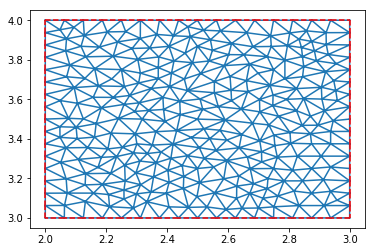

...
For t=0.021599999999999998 step is accepted!

For Omega_1: J(Omega_1)=36.736504296136935



116.865509498


Omega_1 plot:


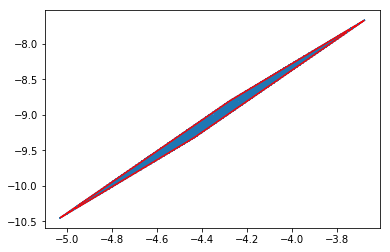

...
For t=0.021599999999999998 step is accepted!

For Omega_2: J(Omega_2)=28.23032755375687



89.9461293893


Omega_2 plot:


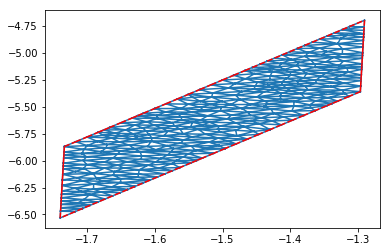

..
For t=0.036 step is accepted!

For Omega_3: J(Omega_3)=6.4894571377592944



20.6008828888


Omega_3 plot:


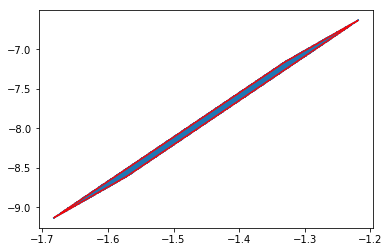

.
For t=0.06 step is accepted!

For Omega_4: J(Omega_4)=0.38913037315911553



1.4426088351


Omega_4 plot:


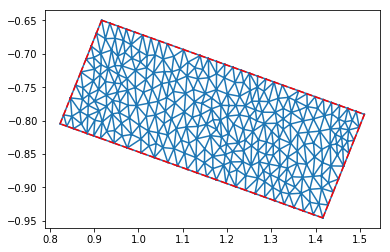

................................ Toleranz unterschritten

Nach 4 von maximal 10 Iterationen


Original shape is: J(Omega_0)=48.654581942464844
Optimized shape is: J(Omega_final)=0.38913037315911553


In [26]:
points = [(3,4),(3,3),(2,3),(2,4)]
facets = [(0,1),(1,2),(2,3),(3,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,1)

For Omega_0: J(Omega_0)=48.654581942464844



139.579426531


Omega_0 plot:


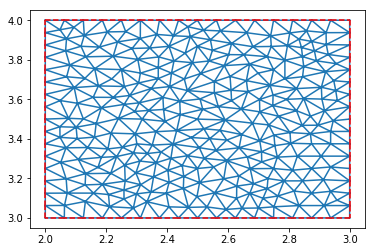

....
For t=0.012959999999999998 step is accepted!

For Omega_1: J(Omega_1)=0.551613792984584



1.68645815752


Omega_1 plot:


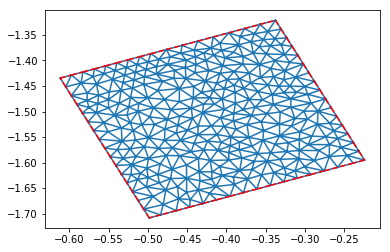

................................ Toleranz unterschritten

Nach 1 von maximal 10 Iterationen


Original shape is: J(Omega_0)=48.654581942464844
Optimized shape is: J(Omega_final)=0.551613792984584


In [27]:
points = [(3,4),(3,3),(2,3),(2,4)]
facets = [(0,1),(1,2),(2,3),(3,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,2)

For Omega_0: J(Omega_0)=0.6641691923235727



3.78167881272


Omega_0 plot:


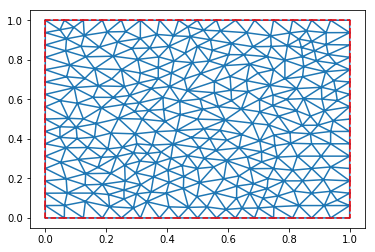


For t=0.1 step is accepted!

For Omega_1: J(Omega_1)=-0.40432370708658294



0.341729478391


Omega_1 plot:


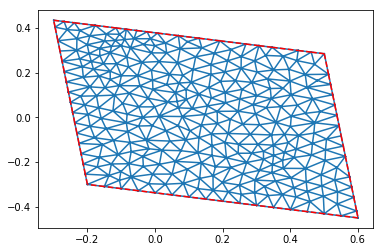

................................ Toleranz unterschritten

Nach 1 von maximal 10 Iterationen


Original shape is: J(Omega_0)=0.6641691923235727
Optimized shape is: J(Omega_final)=-0.40432370708658294


In [28]:
points = [(0,0),(1,0),(1,1),(0,1)]
facets = [(0,1),(1,2),(2,3),(3,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,1)

For Omega_0: J(Omega_0)=0.6641691923235727



3.31161986981


Omega_0 plot:


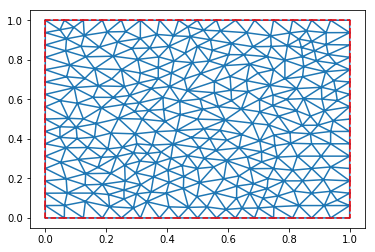


For t=0.1 step is accepted!

For Omega_1: J(Omega_1)=-0.39046197880897354



0.271434741807


Omega_1 plot:


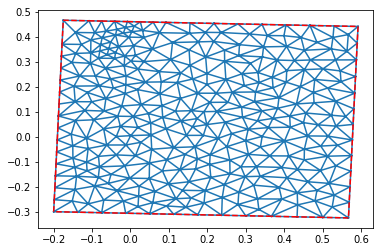

................................ Toleranz unterschritten

Nach 1 von maximal 10 Iterationen


Original shape is: J(Omega_0)=0.6641691923235727
Optimized shape is: J(Omega_final)=-0.39046197880897354


In [29]:
points = [(0,0),(1,0),(1,1),(0,1)]
facets = [(0,1),(1,2),(2,3),(3,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,2)

For Omega_0: J(Omega_0)=8.334620564322464



28.5741518569


Omega_0 plot:


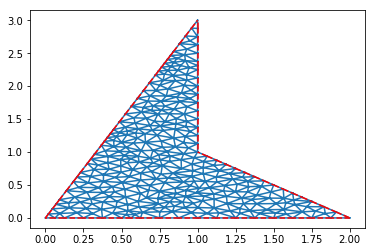

.
For t=0.06 step is accepted!

For Omega_1: J(Omega_1)=1.8587137436517207



6.59447613374


Omega_1 plot:


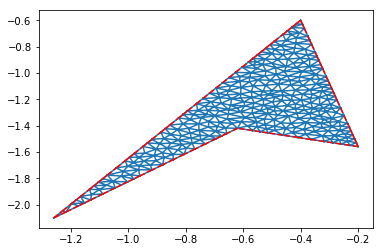


For t=0.1 step is accepted!

For Omega_2: J(Omega_2)=0.5812484317285429



2.72903219402


Omega_2 plot:


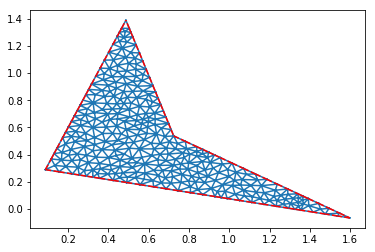

................................ Toleranz unterschritten

Nach 2 von maximal 10 Iterationen


Original shape is: J(Omega_0)=8.334620564322464
Optimized shape is: J(Omega_final)=0.5812484317285429


In [30]:
points = [(0,0),(2,0),(1,1),(1,3)]
facets = [(0,1),(1,2),(2,3),(3,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,1)

For Omega_0: J(Omega_0)=8.334620564322464



26.4695335822


Omega_0 plot:


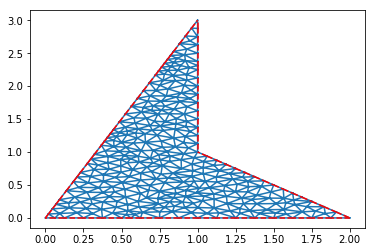

.
For t=0.06 step is accepted!

For Omega_1: J(Omega_1)=0.04874497006711918



0.197757159101


Omega_1 plot:


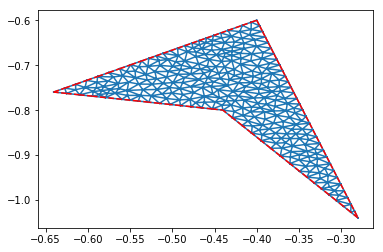

................................ Toleranz unterschritten

Nach 1 von maximal 10 Iterationen


Original shape is: J(Omega_0)=8.334620564322464
Optimized shape is: J(Omega_final)=0.04874497006711918


In [31]:
points = [(0,0),(2,0),(1,1),(1,3)]
facets = [(0,1),(1,2),(2,3),(3,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,2)

For Omega_0: J(Omega_0)=0.5676854593560651



5.9322859126


Omega_0 plot:


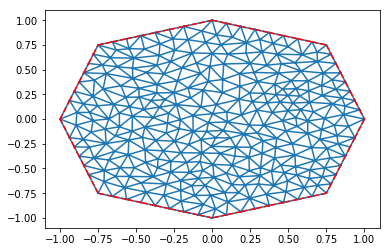


For t=0.1 step is accepted!

For Omega_1: J(Omega_1)=-0.6119843580346473



0.293587997769


Omega_1 plot:


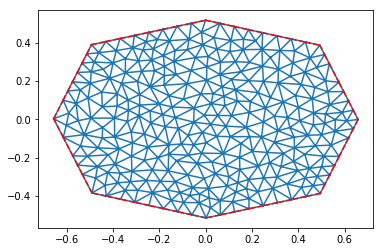

................................ Toleranz unterschritten

Nach 1 von maximal 10 Iterationen


Original shape is: J(Omega_0)=0.5676854593560651
Optimized shape is: J(Omega_final)=-0.6119843580346473


In [32]:
points = [(1,0),(3/4,3/4),(0,1),(-3/4,3/4),(-1,0),(-3/4,-3/4),(0,-1),(3/4,-3/4)]
facets = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,1)

For Omega_0: J(Omega_0)=8.844361322958756



27.3180502143


Omega_0 plot:


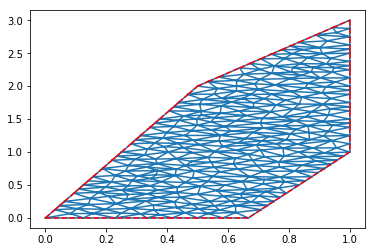

.
For t=0.06 step is accepted!

For Omega_1: J(Omega_1)=0.07805843502156412



0.289774537056


Omega_1 plot:


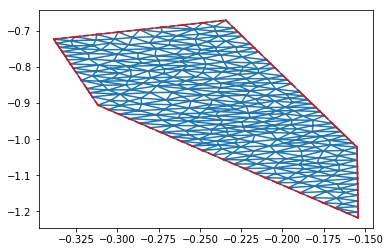

................................ Toleranz unterschritten

Nach 1 von maximal 10 Iterationen


Original shape is: J(Omega_0)=8.844361322958756
Optimized shape is: J(Omega_final)=0.07805843502156412


In [33]:
points = [(0,0),(2/3,0),(1,1),(1,3),(1/2,2)]
facets = [(0,1),(1,2),(2,3),(3,4),(4,0)]
result_alg=alg(2,3,1,points,facets,10,0.1,0.003,2)